In [5]:
import pandas as pd
import numpy as np
#import seaborn as sns 
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Read the CSV data into a DataFrame
data = pd.read_csv("E:/Downloads/Data Science/Machine Learning A-Z™ Hands-On Python & R In Data Science/housingZ.csv")

In [9]:
#display data
data.tail(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20620,-121.48,39.05,40.0,198.0,41.0,151.0,48.0,4.5625,100000.0,INLAND
20621,-121.47,39.01,37.0,1244.0,247.0,484.0,157.0,2.3661,77500.0,INLAND
20622,-121.44,39.00,20.0,755.0,147.0,457.0,157.0,2.4167,67000.0,INLAND
20623,-121.37,39.03,32.0,1158.0,244.0,598.0,227.0,2.8235,65500.0,INLAND
20624,-121.41,39.04,16.0,1698.0,300.0,731.0,291.0,3.0739,87200.0,INLAND
20625,-121.52,39.12,37.0,102.0,17.0,29.0,14.0,4.1250,72000.0,INLAND
20626,-121.43,39.18,36.0,1124.0,184.0,504.0,171.0,2.1667,93800.0,INLAND
20627,-121.32,39.13,5.0,358.0,65.0,169.0,59.0,3.0000,162500.0,INLAND
20628,-121.48,39.10,19.0,2043.0,421.0,1018.0,390.0,2.5952,92400.0,INLAND
20629,-121.39,39.12,28.0,10035.0,1856.0,6912.0,1818.0,2.0943,108300.0,INLAND


<h2>non null values</h2>

In [4]:
# Print a summary of the data (column names, data types, non-null values, etc.)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
# Drop rows with missing values (inplace=True modifies the DataFrame)
data.dropna(inplace=True)

In [11]:
# Print the summary again to see how missing values were handled
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


<h1>splitting the data into training and testing data</h1>

In [12]:
# Import train_test_split from scikit-learn for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# Separate features (X) from the target variable (Y)
X = data.drop(["median_house_value"], axis=1)
Y = data["median_house_value"]

# Split data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Now we can use X_train and Y_train for training our model,
# and X_test and Y_test for evaluating its performance.

In [13]:
# Combine training features and target variable back into a DataFrame
train_data = X_train.join(Y_train)

In [14]:
#train data display
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
6295,-117.90,34.01,27.0,2383.0,472.0,2079.0,494.0,3.9702,<1H OCEAN,141400.0
998,-121.80,37.69,17.0,3956.0,639.0,2222.0,662.0,5.4324,INLAND,215500.0
15609,-116.91,32.73,8.0,4630.0,624.0,2048.0,575.0,6.4745,<1H OCEAN,300300.0
15611,-116.89,32.67,9.0,2652.0,393.0,1355.0,362.0,6.2578,<1H OCEAN,293100.0
18488,-121.59,36.97,16.0,865.0,123.0,403.0,130.0,5.7396,INLAND,308700.0
...,...,...,...,...,...,...,...,...,...,...
2461,-119.69,36.46,29.0,1702.0,301.0,914.0,280.0,2.8125,INLAND,79200.0
15971,-122.41,37.71,40.0,2054.0,433.0,1738.0,429.0,4.9926,NEAR BAY,213900.0
14302,-117.14,32.72,45.0,1140.0,310.0,840.0,339.0,1.6156,NEAR OCEAN,156300.0
6377,-118.02,34.15,44.0,2267.0,426.0,980.0,372.0,3.6000,INLAND,307400.0


In [15]:
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
6295,True,False,False,False,False
998,False,True,False,False,False
15609,True,False,False,False,False
15611,True,False,False,False,False
18488,False,True,False,False,False
...,...,...,...,...,...
2461,False,True,False,False,False
15971,False,False,False,True,False
14302,False,False,False,False,True
6377,False,True,False,False,False


In [16]:
# Create dummy variables for the categorical feature "ocean_proximity"
# Convert them to integers for compatibility with some machine learning models
#dummy_ocean_proximity = pd.get_dummies(train_data.ocean_proximity).astype(int)

pd.get_dummies(train_data.ocean_proximity).astype(int)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
6295,1,0,0,0,0
998,0,1,0,0,0
15609,1,0,0,0,0
15611,1,0,0,0,0
18488,0,1,0,0,0
...,...,...,...,...,...
2461,0,1,0,0,0
15971,0,0,0,1,0
14302,0,0,0,0,1
6377,0,1,0,0,0


In [17]:
# Join the dummy variables back to the training data
#train_data = train_data.join(dummy_ocean_proximity)

train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity).astype(int))

In [18]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
6295,-117.90,34.01,27.0,2383.0,472.0,2079.0,494.0,3.9702,<1H OCEAN,141400.0,1,0,0,0,0
998,-121.80,37.69,17.0,3956.0,639.0,2222.0,662.0,5.4324,INLAND,215500.0,0,1,0,0,0
15609,-116.91,32.73,8.0,4630.0,624.0,2048.0,575.0,6.4745,<1H OCEAN,300300.0,1,0,0,0,0
15611,-116.89,32.67,9.0,2652.0,393.0,1355.0,362.0,6.2578,<1H OCEAN,293100.0,1,0,0,0,0
18488,-121.59,36.97,16.0,865.0,123.0,403.0,130.0,5.7396,INLAND,308700.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,-119.69,36.46,29.0,1702.0,301.0,914.0,280.0,2.8125,INLAND,79200.0,0,1,0,0,0
15971,-122.41,37.71,40.0,2054.0,433.0,1738.0,429.0,4.9926,NEAR BAY,213900.0,0,0,0,1,0
14302,-117.14,32.72,45.0,1140.0,310.0,840.0,339.0,1.6156,NEAR OCEAN,156300.0,0,0,0,0,1
6377,-118.02,34.15,44.0,2267.0,426.0,980.0,372.0,3.6000,INLAND,307400.0,0,1,0,0,0


In [19]:
# Drop the original categorical feature "ocean_proximity" since it's now encoded in dummy variables
# train_data = train_data.drop(['ocean_proximity'],axis=1)


train_data = train_data.drop(['ocean_proximity'],axis=1)

In [20]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
6295,-117.90,34.01,27.0,2383.0,472.0,2079.0,494.0,3.9702,141400.0,1,0,0,0,0
998,-121.80,37.69,17.0,3956.0,639.0,2222.0,662.0,5.4324,215500.0,0,1,0,0,0
15609,-116.91,32.73,8.0,4630.0,624.0,2048.0,575.0,6.4745,300300.0,1,0,0,0,0
15611,-116.89,32.67,9.0,2652.0,393.0,1355.0,362.0,6.2578,293100.0,1,0,0,0,0
18488,-121.59,36.97,16.0,865.0,123.0,403.0,130.0,5.7396,308700.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,-119.69,36.46,29.0,1702.0,301.0,914.0,280.0,2.8125,79200.0,0,1,0,0,0
15971,-122.41,37.71,40.0,2054.0,433.0,1738.0,429.0,4.9926,213900.0,0,0,0,1,0
14302,-117.14,32.72,45.0,1140.0,310.0,840.0,339.0,1.6156,156300.0,0,0,0,0,1
6377,-118.02,34.15,44.0,2267.0,426.0,980.0,372.0,3.6000,307400.0,0,1,0,0,0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>, <Axes: >, <Axes: >]],
      dtype=object)

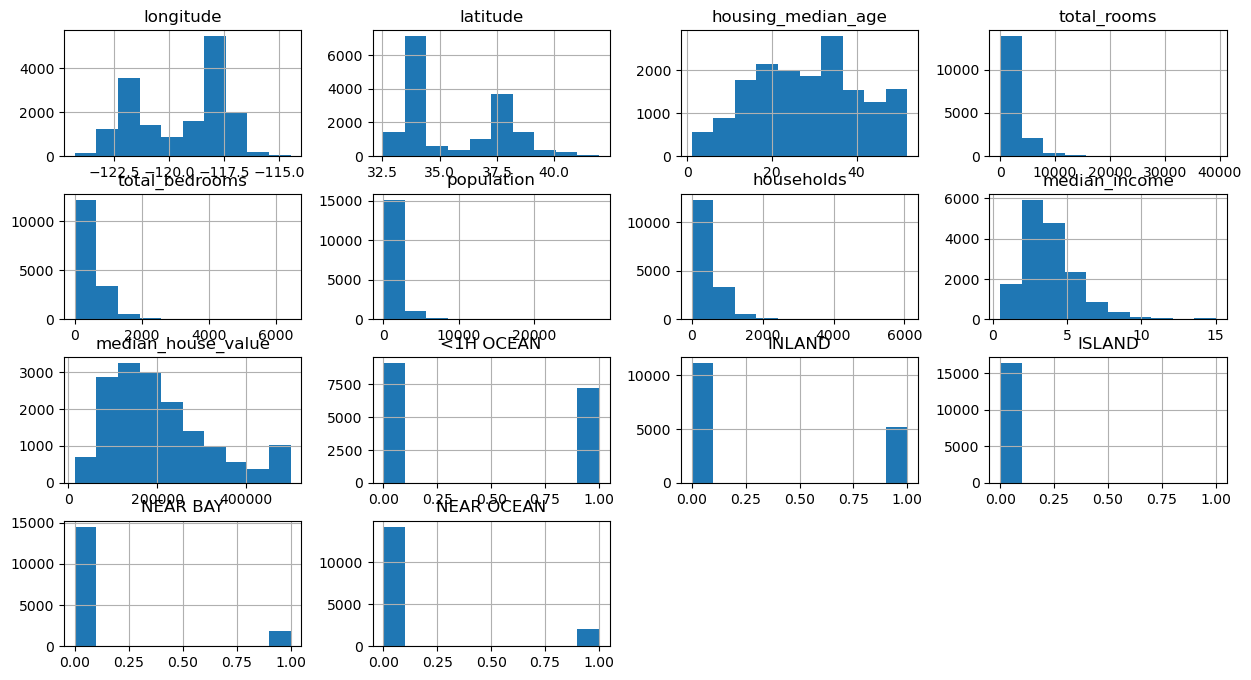

In [21]:
# Visualize the distribution of features using histograms
# train_data.hist(figsize=(15,8))

#observing in histogram
train_data.hist(figsize=(15,8))

In [22]:
# Calculate the correlation matrix to see how features are related to each other
# train_data.corr()

train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.923524,-0.106407,0.038888,0.061703,0.096365,0.048322,-0.013348,-0.041819,0.317500,-0.055828,0.010612,-0.474989,0.051141
latitude,-0.923524,1.000000,0.007863,-0.029971,-0.059006,-0.105476,-0.064414,-0.083448,-0.149387,-0.445507,0.353738,-0.018613,0.358167,-0.166007
housing_median_age,-0.106407,0.007863,1.000000,-0.361337,-0.319897,-0.302815,-0.302776,-0.117775,0.108066,0.041889,-0.238755,0.019145,0.259700,0.025784
total_rooms,0.038888,-0.029971,-0.361337,1.000000,0.929734,0.864991,0.917127,0.202869,0.134734,-0.004003,0.027180,-0.008626,-0.024558,-0.008431
total_bedrooms,0.061703,-0.059006,-0.319897,0.929734,1.000000,0.885339,0.978887,-0.004893,0.049023,0.016064,-0.004895,-0.004989,-0.020102,0.002075
population,0.096365,-0.105476,-0.302815,0.864991,0.885339,1.000000,0.915212,0.007188,-0.027417,0.075653,-0.019386,-0.012075,-0.065051,-0.023716
households,0.048322,-0.064414,-0.302776,0.917127,0.978887,0.915212,1.000000,0.015846,0.064376,0.039965,-0.037589,-0.010353,-0.011348,0.004188
median_income,-0.013348,-0.083448,-0.117775,0.202869,-0.004893,0.007188,0.015846,1.000000,0.692538,0.175180,-0.244650,-0.010324,0.055997,0.028620
median_house_value,-0.041819,-0.149387,0.108066,0.134734,0.049023,-0.027417,0.064376,0.692538,1.000000,0.263237,-0.490082,0.026097,0.162003,0.138380
<1H OCEAN,0.317500,-0.445507,0.041889,-0.004003,0.016064,0.075653,0.039965,0.175180,0.263237,1.000000,-0.608772,-0.015584,-0.314178,-0.341771


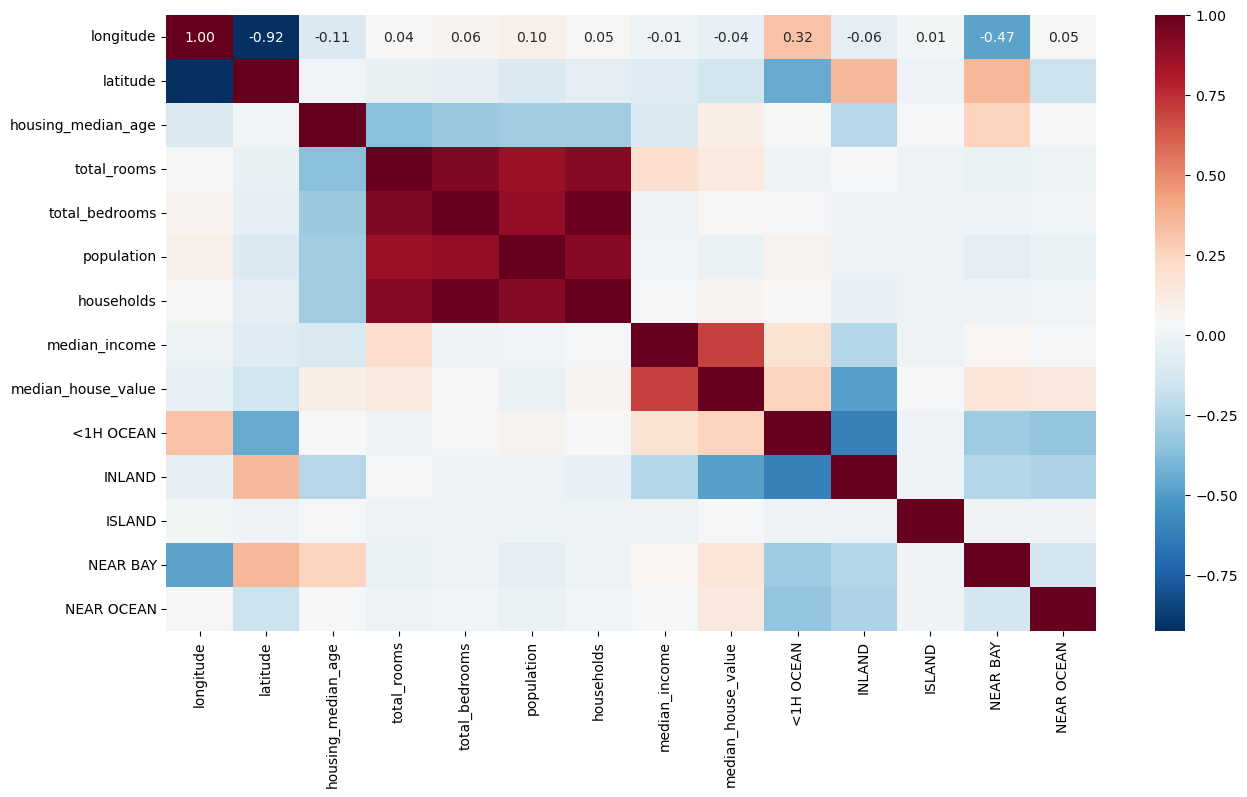

In [23]:
# Create a heatmap to visualize the correlation matrix (commented out, using seaborn heatmap instead)
# plt.figure(figsize=(15,8))
# sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


#plt.figure(figsize=(15,8))
#sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

# Create a heatmap to visualize the correlation matrix using seaborn
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, fmt=".2f", cmap="RdBu_r")  # Adjust ".2f" for desired decimal places
plt.show()

<h1>
    Data Preprocessing
</h1>

In [19]:
# Apply logarithmic transformation to some features to handle skewness

train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>, <Axes: >, <Axes: >]],
      dtype=object)

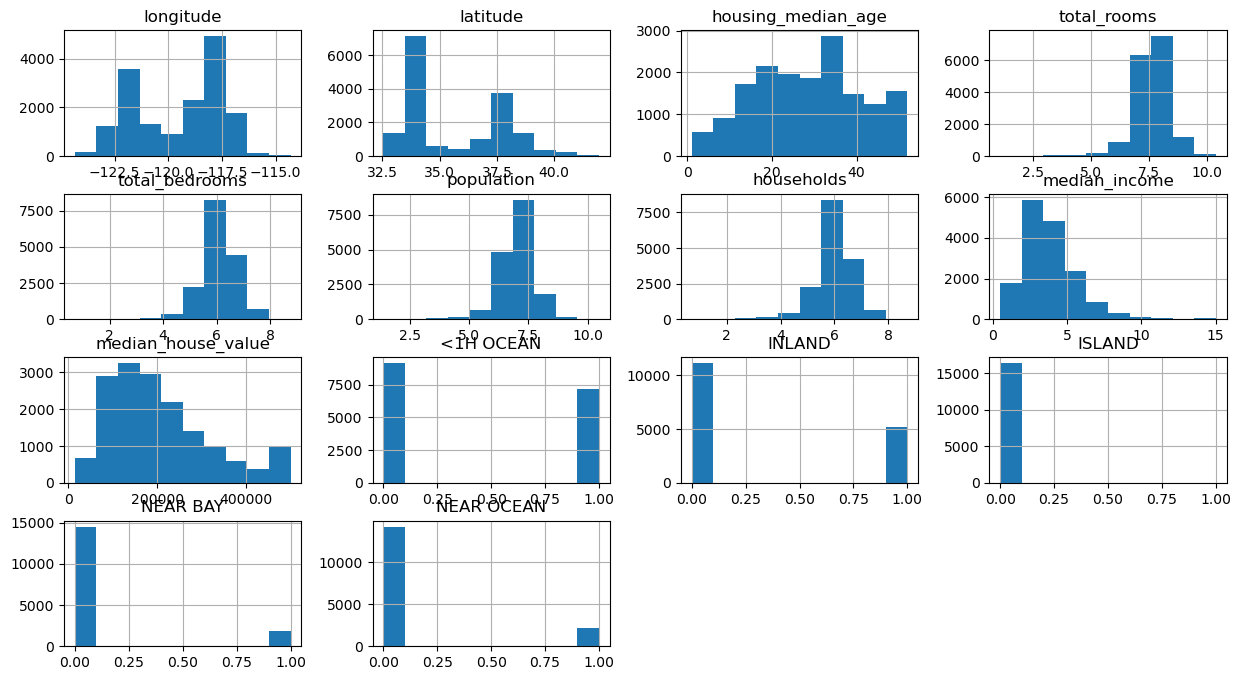

In [20]:
# Visualize the distribution of features after transformation (histograms)

train_data.hist(figsize=(15,8))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17480,-119.86,34.38,26.0,7.394493,5.929589,7.365813,5.886104,2.1471,187500.0,0,0,0,0,1
19457,-120.93,37.67,6.0,8.158230,6.489205,7.638198,6.469250,3.3844,138500.0,0,1,0,0,0
2389,-119.48,37.00,16.0,7.974189,6.313548,7.291656,6.234411,3.1736,111800.0,0,1,0,0,0
15199,-117.10,32.90,16.0,8.004700,6.100319,6.954639,6.082219,5.1490,184300.0,1,0,0,0,0
5645,-118.30,33.75,23.0,7.579679,6.249975,7.282761,6.267201,3.5056,203100.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3586,-118.53,34.23,32.0,8.304000,6.892642,7.892078,6.848005,3.0321,240000.0,1,0,0,0,0
13372,-117.51,34.14,21.0,7.806289,5.945421,6.998510,5.793014,4.6437,191700.0,0,1,0,0,0
10611,-117.79,33.68,9.0,7.398786,5.690359,6.834109,5.697093,5.7858,265900.0,1,0,0,0,0
7986,-118.17,33.86,10.0,7.417580,6.232448,7.222566,6.202536,2.9886,175000.0,1,0,0,0,0


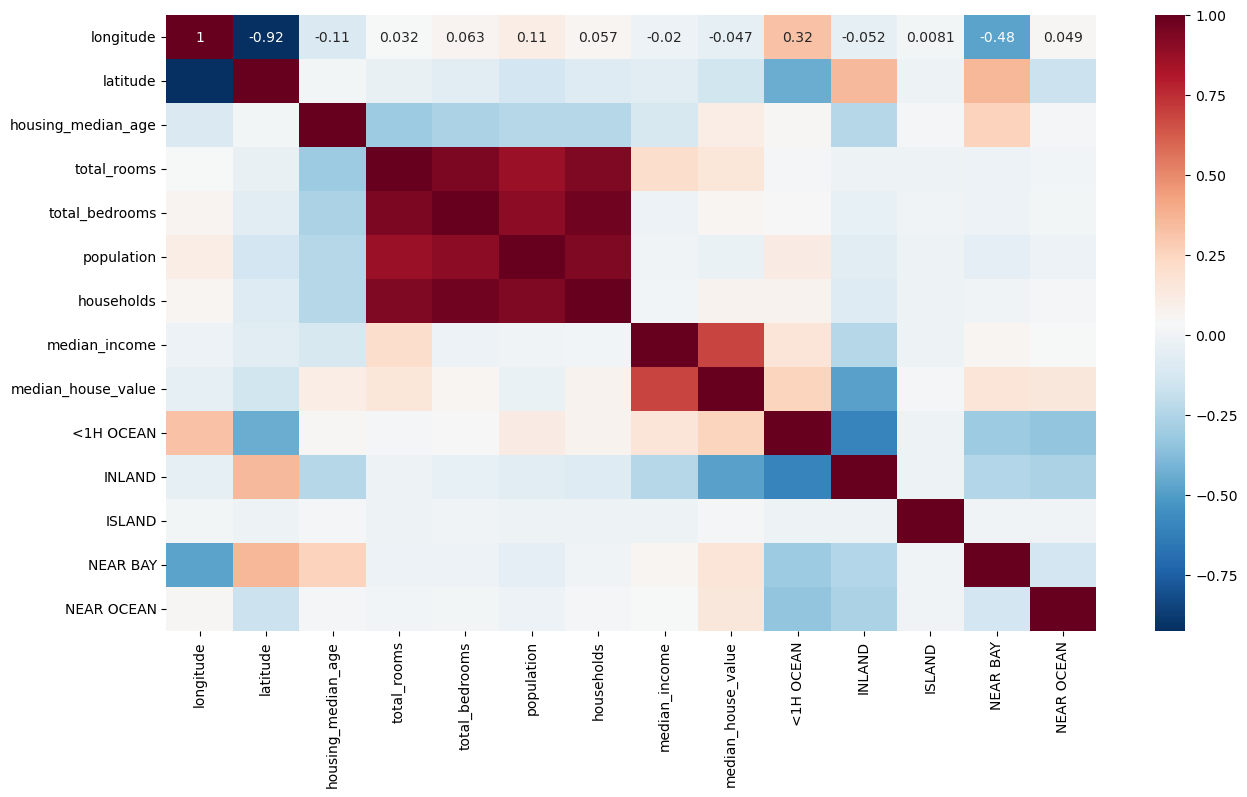

In [21]:
# Create another heatmap to see how correlations changed after transformation
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="RdBu_r")

train_data

<Axes: >

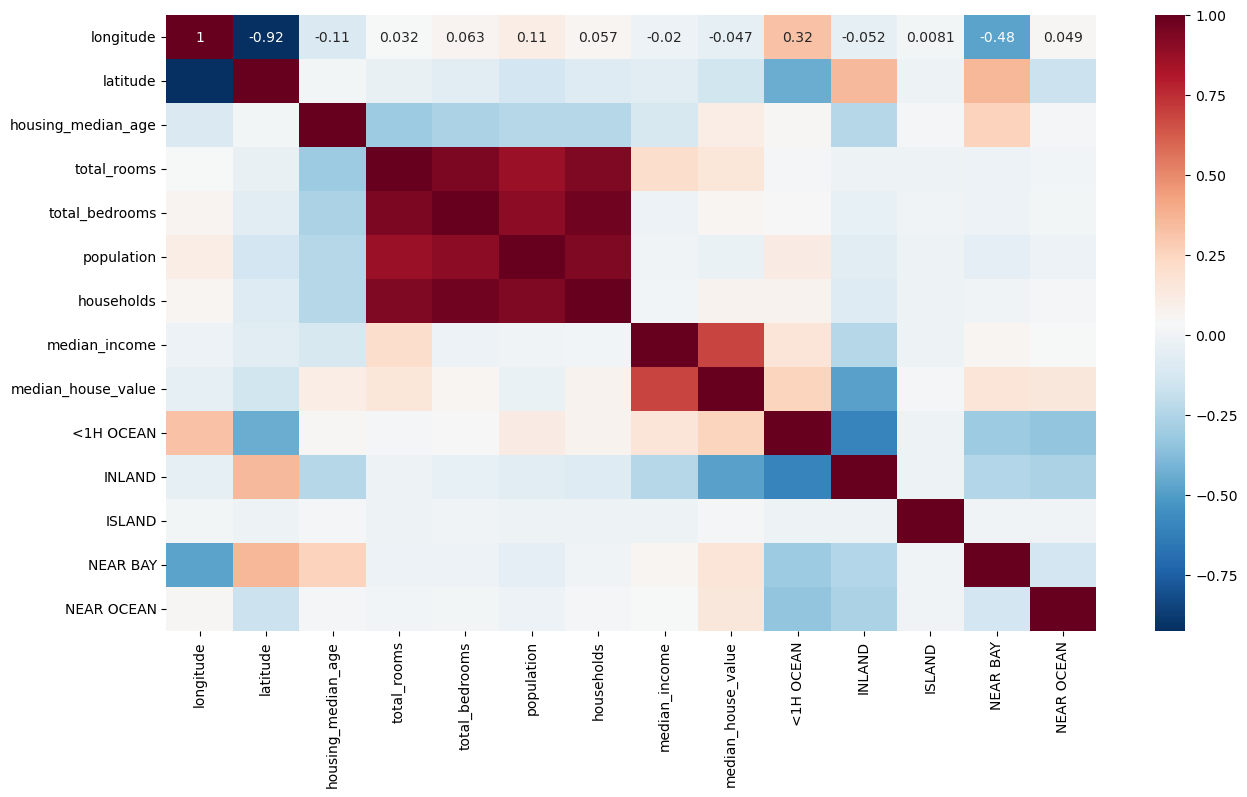

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="RdBu_r")

<Axes: xlabel='latitude', ylabel='longitude'>

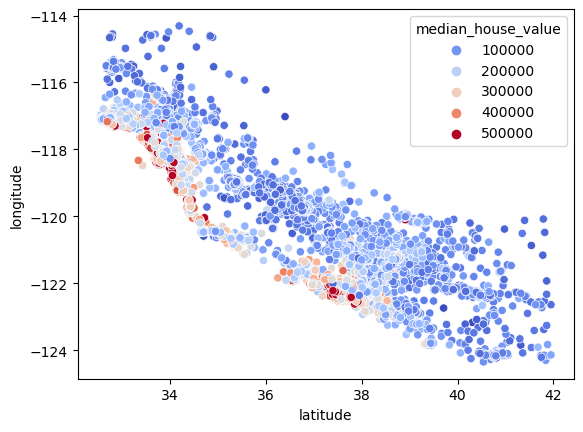

In [23]:
# Create a scatterplot to visualize the relationship between latitude, longitude, and median house value
sns.scatterplot(x='latitude',y='longitude',data=train_data, hue='median_house_value', palette='coolwarm')

In [24]:
# Feature engineering: Create new features based on existing ones
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

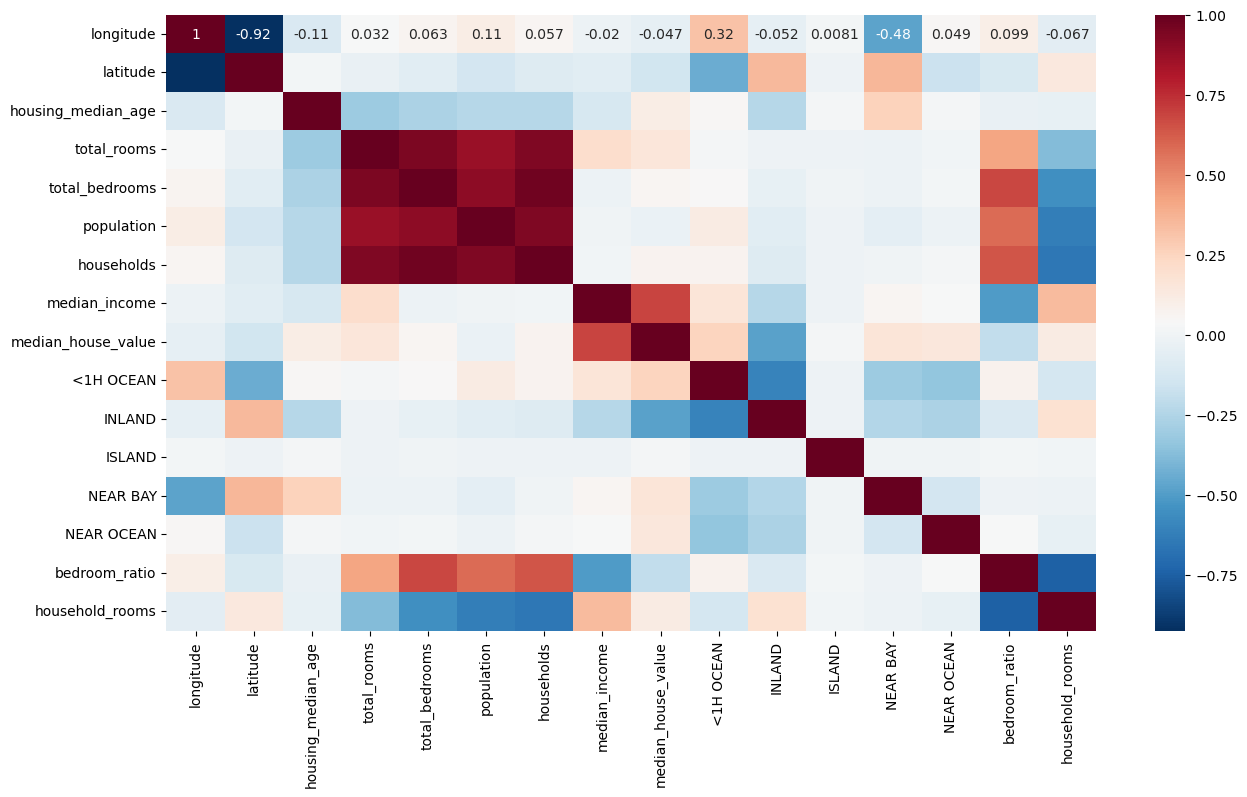

In [25]:
# Create another heatmap to see how correlations changed after feature engineering
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="RdBu_r")

In [26]:
# Import LinearRegression from scikit-learn for linear regression modeling
from sklearn.linear_model import LinearRegression

# Separate features from target variable again for training
X_train, Y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(X_train, Y_train)

LinearRegression()

In [27]:
  test_data = X_test.join(Y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity).astype(int))
test_data = test_data.drop(["ocean_proximity"],axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']


In [28]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
6330,-117.94,33.99,18.0,8.716208,6.926577,8.043342,6.890609,4.9932,284000.0,1,0,0,0,0,0.794678,1.264940
13563,-117.28,34.15,38.0,7.591862,5.840642,6.680855,5.843544,3.8125,97400.0,0,1,0,0,0,0.769329,1.299188
20315,-119.16,34.12,17.0,5.416100,4.262680,4.997212,4.276666,3.6167,280000.0,0,0,0,0,1,0.787039,1.266430
19492,-121.00,37.65,52.0,8.265650,6.689599,7.478170,6.659294,2.5089,119000.0,0,1,0,0,0,0.809325,1.241220
3182,-119.79,36.31,25.0,8.514189,6.937314,7.789455,6.869014,2.2937,72300.0,0,1,0,0,0,0.814794,1.239507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9835,-121.92,36.63,36.0,6.777647,5.170484,5.857933,5.129899,3.4167,339100.0,1,0,0,0,0,0.762873,1.321205
19031,-122.02,38.37,16.0,7.822445,5.805135,7.020191,5.826000,6.4894,198000.0,0,1,0,0,0,0.742113,1.342678
20498,-118.70,34.29,25.0,7.425954,5.533389,6.760415,5.594711,6.1834,229800.0,1,0,0,0,0,0.745142,1.327317
11550,-117.98,33.75,24.0,8.259976,6.688355,7.890208,6.650279,3.8158,180000.0,1,0,0,0,0,0.809731,1.242049


In [29]:
X_test, Y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [30]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
6330,-117.94,33.99,18.0,8.716208,6.926577,8.043342,6.890609,4.9932,1,0,0,0,0,0.794678,1.264940
13563,-117.28,34.15,38.0,7.591862,5.840642,6.680855,5.843544,3.8125,0,1,0,0,0,0.769329,1.299188
20315,-119.16,34.12,17.0,5.416100,4.262680,4.997212,4.276666,3.6167,0,0,0,0,1,0.787039,1.266430
19492,-121.00,37.65,52.0,8.265650,6.689599,7.478170,6.659294,2.5089,0,1,0,0,0,0.809325,1.241220
3182,-119.79,36.31,25.0,8.514189,6.937314,7.789455,6.869014,2.2937,0,1,0,0,0,0.814794,1.239507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9835,-121.92,36.63,36.0,6.777647,5.170484,5.857933,5.129899,3.4167,1,0,0,0,0,0.762873,1.321205
19031,-122.02,38.37,16.0,7.822445,5.805135,7.020191,5.826000,6.4894,0,1,0,0,0,0.742113,1.342678
20498,-118.70,34.29,25.0,7.425954,5.533389,6.760415,5.594711,6.1834,1,0,0,0,0,0.745142,1.327317
11550,-117.98,33.75,24.0,8.259976,6.688355,7.890208,6.650279,3.8158,1,0,0,0,0,0.809731,1.242049


In [31]:
Y_test

6330     284000.0
13563     97400.0
20315    280000.0
19492    119000.0
3182      72300.0
           ...   
9835     339100.0
19031    198000.0
20498    229800.0
11550    180000.0
3717     221500.0
Name: median_house_value, Length: 4087, dtype: float64

In [32]:
import sklearn.linear_model as linear_model
#Create a linear regression model
model = linear_model.LinearRegression()
#train the model
model.fit(X_test, Y_test)

LinearRegression()

In [33]:
#Make predictions on the test data
predictions = model.predict(X_test)

In [34]:
#Evaluate the model (optional)
#Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 4190502276.000183


In [35]:
#R-squared
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, predictions)
print("R-squared:", r2)

R-squared: 0.6780025022144646


In [36]:
#Completed code

In [37]:
import pandas as pd  # Assuming you're using pandas for data manipulation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assumed we have our training and test data prepared
X_test, Y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']
X_test, Y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

# Create and train the model
model = LinearRegression()
model.fit(X_test, Y_test)

# Make predictions
predictions = model.predict(X_test)

# Evaluate (optional)
mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 4190502276.000183
R-squared: 0.6780025022144646
